Introduction

The dataset contains the weather and season information for Capital bikeshare system between years 2011 and 2012. Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. 

Here, we use number to represent the weather situation.

Weather Situation:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [1]:
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: Error: package or namespace load failed for ‘tidymodels’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘lubridate’ 1.7.10 is already loaded, but >= 1.8.0 is required


In [78]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip", temp)
data <- read_delim(unz(temp,"day.csv"),delim = ",", col_names = TRUE)
unlink(temp) 
data$weathersit <- as_factor(data$weathersit)
data$season <- as_factor(data$season)
levels(data$season) <- c("Winter","Spring","Summer","Fall")

data


Rows: 731 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): instant, season, yr, mnth, holiday, weekday, workingday, weathers...
date  (1): dteday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,Winter,0,1,0,6,0,2,0.3441670,0.3636250,0.805833,0.1604460,331,654,985
2,2011-01-02,Winter,0,1,0,0,0,2,0.3634780,0.3537390,0.696087,0.2485390,131,670,801
3,2011-01-03,Winter,0,1,0,1,1,1,0.1963640,0.1894050,0.437273,0.2483090,120,1229,1349
4,2011-01-04,Winter,0,1,0,2,1,1,0.2000000,0.2121220,0.590435,0.1602960,108,1454,1562
5,2011-01-05,Winter,0,1,0,3,1,1,0.2269570,0.2292700,0.436957,0.1869000,82,1518,1600
6,2011-01-06,Winter,0,1,0,4,1,1,0.2043480,0.2332090,0.518261,0.0895652,88,1518,1606
7,2011-01-07,Winter,0,1,0,5,1,2,0.1965220,0.2088390,0.498696,0.1687260,148,1362,1510
8,2011-01-08,Winter,0,1,0,6,0,2,0.1650000,0.1622540,0.535833,0.2668040,68,891,959
9,2011-01-09,Winter,0,1,0,0,0,1,0.1383330,0.1161750,0.434167,0.3619500,54,768,822


In [80]:
BikeShare <- data %>%
filter(yr == 0)%>%
filter(season %in% c("Winter","Spring")) %>%
select(season,weathersit)
BikeShare

season,weathersit
<fct>,<fct>
Winter,2
Winter,2
Winter,1
Winter,1
Winter,1
Winter,1
Winter,2
Winter,2
Winter,1


Objective

We want to conduct a hypothesis test to investigate if the proportion of bike rentals under a clear weather (weathersit = 1) are the same for spring and winter. Here are we using the data only from 2011.


In [81]:
sample_proportion <- BikeShare %>%
group_by(season) %>%
summarize(prop = sum(weathersit == 1)/n())
sample_proportion

season,prop
<fct>,<dbl>
Winter,0.6222222
Spring,0.5652174


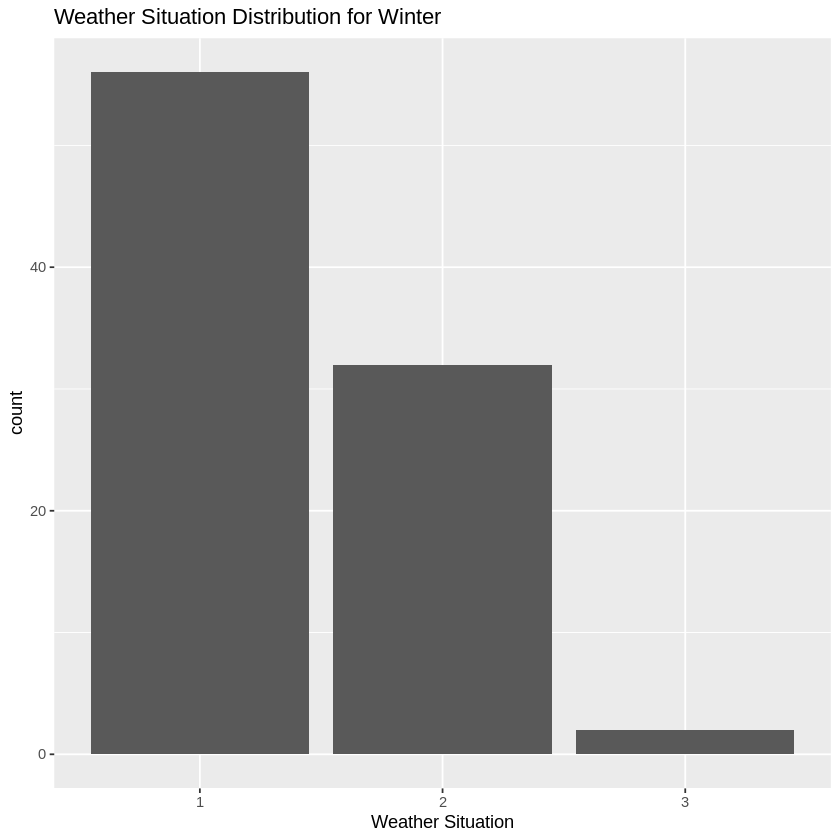

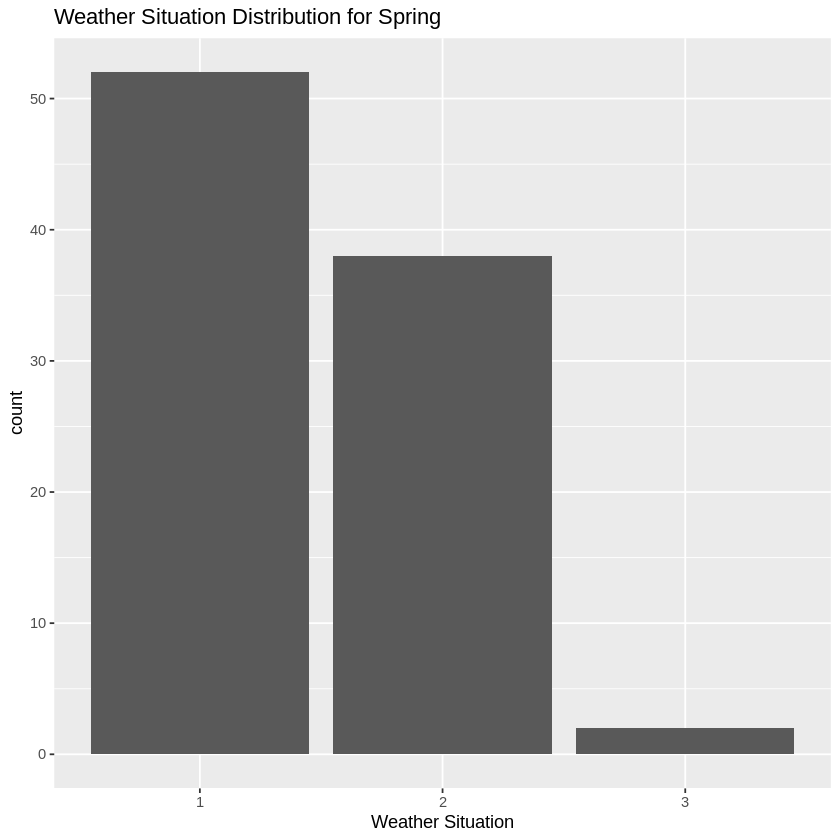

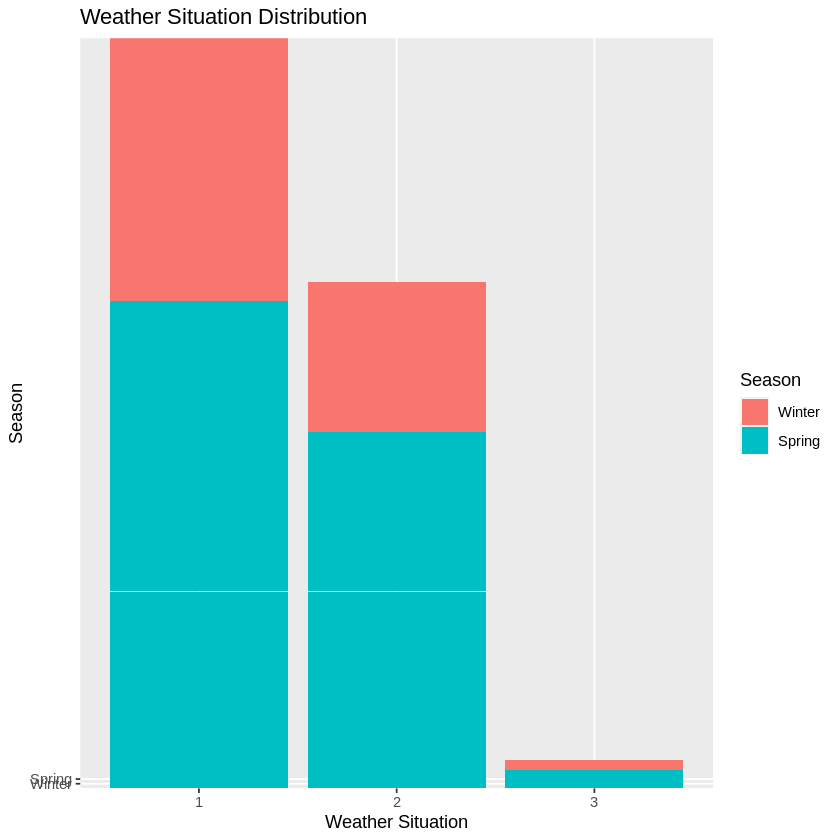

In [83]:
winter <- BikeShare %>%
filter(season == "Winter") %>%
ggplot(aes(x = weathersit))+
geom_bar(stat = "count")+
labs(x = "Weather Situation")+
ggtitle("Weather Situation Distribution for Winter")

winter 

spring <- BikeShare %>%
filter(season == "Spring") %>%
ggplot(aes(x = weathersit))+
geom_bar(stat = "count")+
labs(x = "Weather Situation")+
ggtitle("Weather Situation Distribution for Spring")

spring 

BikeShare_plot <- BikeShare %>%
ggplot()+
geom_bar(aes(x = weathersit, y = season, fill = season),stat = "identity")+
labs(x = "Weather Situation", y = "Season",fill = "Season")+
ggtitle("Weather Situation Distribution")
BikeShare_plot